In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
import os
os.getcwd()

'/content'

In [4]:
df = pd.read_csv("/content/Netflix/netflix_content_2023.csv")

In [5]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [6]:
df['Hours Viewed'] = df['Hours Viewed'].replace(",","",regex=True).astype(float)
df['Hours Viewed']

,Hours Viewed
0,812100000.0
1,665100000.0
2,622800000.0
3,507700000.0
4,503000000.0
...,...
24807,100000.0
24808,100000.0
24809,100000.0
24810,100000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                24812 non-null  object 
 1   Available Globally?  24812 non-null  object 
 2   Release Date         8166 non-null   object 
 3   Hours Viewed         24812 non-null  float64
 4   Language Indicator   24812 non-null  object 
 5   Content Type         24812 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [8]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 24812 entries, 0 to 24811
Series name: Release Date
Non-Null Count  Dtype         
--------------  -----         
8166 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 194.0 KB


In [9]:
df.dropna(inplace = True)

In [10]:
hours_viewed_content_type = df.groupby('Content Type')['Hours Viewed'].sum().reset_index()
hours_viewed_content_type['Hours Viewed']=hours_viewed_content_type['Hours Viewed']/(10**9) # converting in billions
hours_viewed_content_type

,Content Type,Hours Viewed
0,Movie,28.1702
1,Show,62.6578


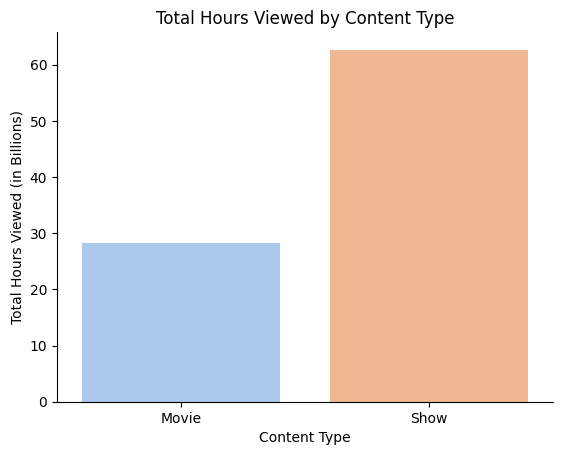

In [12]:
sns.barplot(x='Content Type', y='Hours Viewed', data=hours_viewed_content_type, palette='pastel')
sns.despine(bottom = False, left = False)
#ax.bar_label(ax.containers[0])
plt.title('Total Hours Viewed by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed (in Billions)')
plt.show()


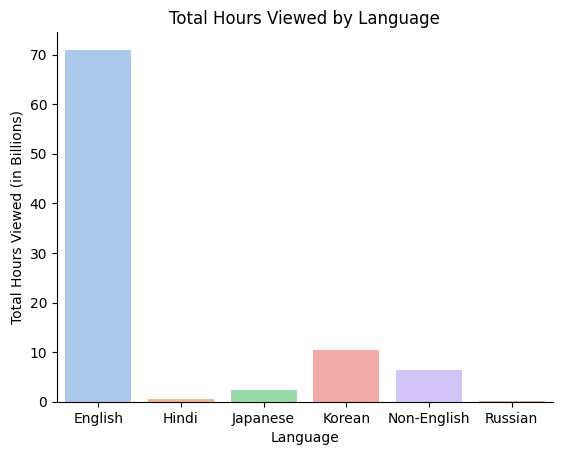

In [13]:
hours_viewed_language = df.groupby('Language Indicator')['Hours Viewed'].sum().reset_index()
hours_viewed_language['Hours Viewed']=hours_viewed_language['Hours Viewed']/(10**9)# converting in billions
#sns.barplot(x=hours_viewed_language.index, y=hours_viewed_language.values, palette='pastel') when reset_index() not used
sns.barplot(x='Language Indicator', y='Hours Viewed', data=hours_viewed_language, palette='pastel')
sns.despine(bottom = False, left = False)
plt.title('Total Hours Viewed by Language')
plt.xlabel('Language')
plt.ylabel('Total Hours Viewed (in Billions)')
plt.show()

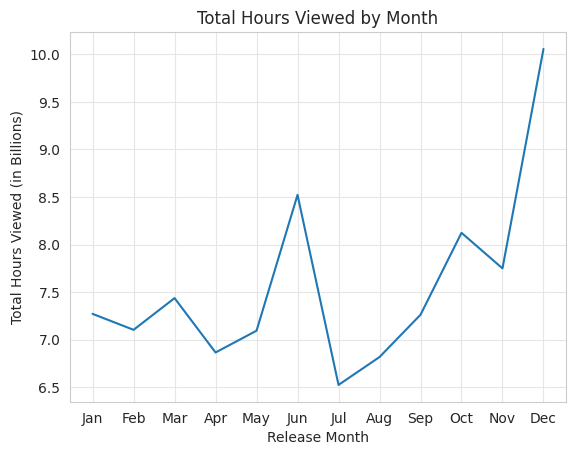

In [14]:
df['Release Month'] = df['Release Date'].dt.month
hours_viewed_month = df.groupby('Release Month')['Hours Viewed'].sum().reset_index()
hours_viewed_month['Hours Viewed']=hours_viewed_month['Hours Viewed']/(10**9)

sns.set_style('whitegrid',{"grid.color": ".9"})
sns.despine(bottom = False, left = False)
sns.lineplot(x='Release Month', y='Hours Viewed', data=hours_viewed_month, markers='o')
plt.title('Total Hours Viewed by Month')
#plt.xlabel('Month')
plt.ylabel('Total Hours Viewed (in Billions)')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [15]:
# top5 titles by hours viewed
top5_titles = df.sort_values(by='Hours Viewed', ascending=False).head(5)
top5_titles

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,6
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,8


In [16]:
# Viewership hours by months and content type
viewership_month_content_type = df.pivot_table(index = 'Release Month', columns='Content Type', values='Hours Viewed',aggfunc=sum)
viewership_month_content_type['Movie'] = viewership_month_content_type['Movie']/(10**9) # in billions
viewership_month_content_type['Show'] = viewership_month_content_type['Show']/(10**9) # in billions
viewership_month_content_type


Content Type,Movie,Show
Release Month,,
1,2.2759,4.9957
2,1.6544,5.4493
3,2.1094,5.3277
4,2.7576,4.1081
5,2.5205,4.5741
6,3.1358,5.3862
7,1.6157,4.9091
8,2.1864,4.6314
9,2.0923,5.1699


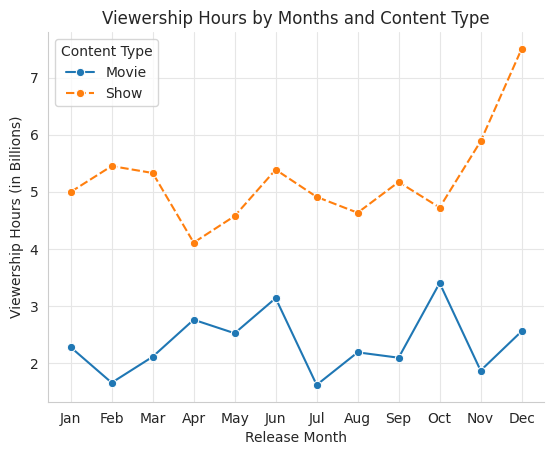

In [17]:
sns.set_style('whitegrid',{"grid.color": ".9"})
sns.lineplot(data=viewership_month_content_type,markers='o')
sns.despine(bottom = False, left = False)
plt.title('Viewership Hours by Months and Content Type')
#plt.xlabel('Month')
plt.ylabel('Viewership Hours (in Billions)')
plt.legend(title='Content Type')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [18]:
def season(month):
  if month in [12,1,2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Summer'
  else:
    return 'Autumn'

df['Release Season'] = df['Release Month'].apply(season)

In [19]:
seasonal_viewership = df.groupby('Release Season')['Hours Viewed'].sum().reset_index()
seasonal_viewership

,Release Season,Hours Viewed
0,Autumn,2.313490e+10
1,Spring,2.139740e+10
2,Summer,2.186460e+10
3,Winter,2.443110e+10


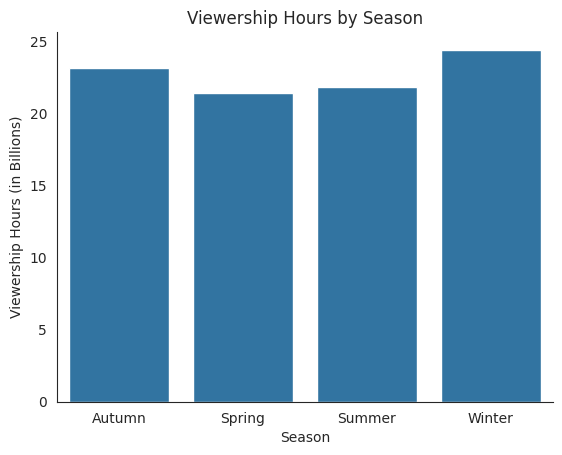

In [20]:
seasonal_viewership = df.groupby('Release Season')['Hours Viewed'].sum().reset_index()
seasonal_viewership['Hours Viewed'] = seasonal_viewership['Hours Viewed']/(10**9)
sns.set_style('white')
sns.barplot(data=seasonal_viewership,x='Release Season', y='Hours Viewed')
sns.despine(bottom = False, left = False)
plt.title('Viewership Hours by Season')
plt.xlabel('Season')
plt.ylabel('Viewership Hours (in Billions)')
plt.show()

In [21]:
monthly_release = df['Release Month'].value_counts().sort_index().reset_index()
monthly_release.columns = ['Release Month','Release Count']
monthly_viewership = df.groupby('Release Month')['Hours Viewed'].sum().reset_index()
monthly_viewership['Hours Viewed'] = monthly_viewership['Hours Viewed']/(10**9)
monthly_viewership
monthly_release

,Release Month,Release Count
0,1,608
1,2,560
2,3,690
3,4,647
4,5,624
5,6,670
6,7,631
7,8,674
8,9,739
9,10,802


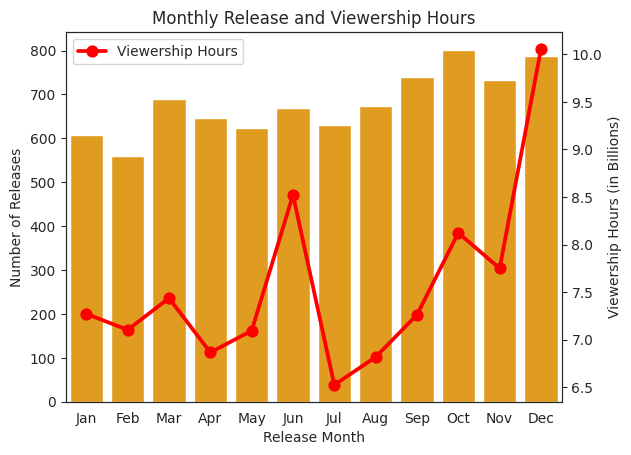

In [33]:
fig, ax1 = plt.subplots()
sns.barplot(data=monthly_release,x='Release Month', y='Release Count', ax=ax1, color='orange')
ax1.set_ylabel('Number of Releases')
ax2 = ax1.twinx()
sns.pointplot(data=monthly_viewership,x='Release Month', y='Hours Viewed', markers='o',ax=ax2, color='red')
sns.despine(bottom = False, left = False, right= False, top= False)
ax2.set_ylabel('Viewership Hours (in Billions)')
plt.title('Monthly Release and Viewership Hours')
#plt.xlabel('Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#ax1.yaxis.label.set_color('orange')
#ax2.yaxis.label.set_color('red')
ax2.legend(['Viewership Hours'])
plt.show()

In [23]:
df['Release Day'] = df['Release Date'].dt.day_name()
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Release Season,Release Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3,Spring,Thursday
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1,Winter,Thursday
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12,Winter,Friday
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11,Autumn,Wednesday
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5,Spring,Thursday


In [28]:
Weekly_release = df['Release Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
Weekly_release

,Release Day,count
0,Monday,436
1,Tuesday,995
2,Wednesday,1310
3,Thursday,1145
4,Friday,3863
5,Saturday,238
6,Sunday,179


In [27]:
Weekly_viewership = df.groupby('Release Day')['Hours Viewed'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
Weekly_viewership['Hours Viewed'] = Weekly_viewership['Hours Viewed']/(10**9)
Weekly_viewership

,Release Day,Hours Viewed
0,Monday,3.9545
1,Tuesday,5.5623
2,Wednesday,15.7441
3,Thursday,20.2928
4,Friday,38.2172
5,Saturday,5.1218
6,Sunday,1.9353


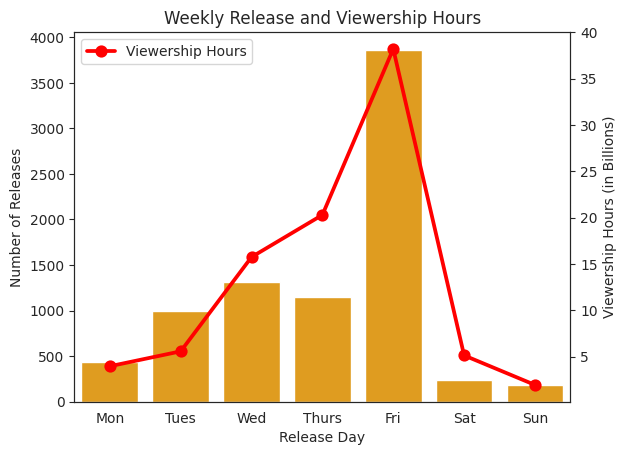

In [36]:
fig, ax3 = plt.subplots()
sns.barplot(data=Weekly_release,x='Release Day', y='count', ax=ax3, color='orange')
ax3.set_ylabel('Number of Releases')
ax4 = ax3.twinx()
sns.pointplot(data=Weekly_viewership,x='Release Day', y='Hours Viewed', markers='o',ax=ax4, color='red')
#sns.despine(bottom = False, left = False)
ax4.set_ylabel('Viewership Hours (in Billions)')
plt.title('Weekly Release and Viewership Hours')
#plt.xlabel('Month')
plt.xticks([0,1,2,3,4,5,6],['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
#ax1.yaxis.label.set_color('orange')
#ax2.yaxis.label.set_color('red')
ax4.legend(['Viewership Hours'])
plt.show()